# Document Clustering

Clustering adalah salah satu Teknik Pembelajaran Mesin Tanpa Pengawasan yang paling penting. Algoritme ini sangat berguna, terutama dalam situasi di mana data berlabel merupakan barang mewah. Teknik pengelompokan membantu kita memahami pola yang mendasari data (lebih-lebih di sekitar mereka serupa) bersama dengan kemampuan untuk mem-bootstrap pendekatan pembelajaran terawasi tertentu juga.

Teknik pengelompokan telah dipelajari secara mendalam selama bertahun-tahun dan ada beberapa algoritma pengelompokan yang sangat kuat yang tersedia. Untuk tutorial ini, kita akan bekerja dengan kumpulan data buku yang berisi penulis buku, deskripsi, genre, dan informasi terkait lainnya. Kami akan bekerja dengan metode K-Means dan Ward-Hierarchical-Clustering.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('goodreads_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [3]:
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


## Giliran Anda: Kelompokkan Buku Serupa

Di sini Anda akan mempelajari cara mengelompokkan dokumen teks (dalam hal ini film). Kami akan menggunakan pipa berikut:

Teks pra-pemrosesan
Rekayasa Fitur
Pengelompokan Menggunakan K-Means
Menemukan Nilai Optimal untuk K
Siapkan Kelompok Buku
Pengelompokan adalah pendekatan tanpa pengawasan untuk menemukan kelompok item serupa dalam kumpulan data apa pun. Ada berbagai algoritme pengelompokan dan K-Means cukup sederhana namun berpengaruh. Sebagian besar film memiliki emosi yang berbeda dan dapat dikategorikan ke dalam beberapa genre (sama halnya dengan film yang tercantum dalam kumpulan data kami saat ini). Bisakah pengelompokan deskripsi film membantu kita memahami pengelompokan ini?

Analisis kesamaan (di bagian sebelumnya) adalah titik awal yang baik, tetapi dapatkah kita melakukannya dengan lebih baik?

## Text Preprocessing

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import nltk
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # Check if doc is a string or convert to an empty string
    if not isinstance(doc, str):
        return ''
    
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, flags=re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

# Ensure 'Description' column is of string type
df['Description'] = df['Description'].astype(str)

# Apply normalization to the 'Description' column
norm_corpus = normalize_corpus(list(df['Description']))
len(norm_corpus)


10000

In [6]:
norm_corpus[4799]

'always one judith mcnaughts masterful moving love stories powerfully brings life fiery passion freespirited american beauty troubled english lordsuddenly orphaned alone victoria seaton sails vast ocean eager reclaim heritage wakefield sumptuous english estate distant cousin notorious lord jason fielding bewildered arrogance yet drawn pantherlike grace senses painful memories smolder eyes gathers last arms arousing sweet insistent hunger wed embraced fierce consuming joy free pasts cruel grasp moment anguish victoria discovers treachery heart love love dreamed would triumph always'

## Extract TF-IDF

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words = stop_words + ['one', 'two', 'get']
cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8, stop_words=stop_words)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

(10000, 12074)

In [8]:
cv

CountVectorizer(max_df=0.8, min_df=10, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

# Cluster Books Menggunakan K-Means

In [9]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = 6
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cv_matrix)
km

KMeans(max_iter=10000, n_clusters=6, n_init=50, random_state=42)

In [10]:
from collections import Counter

Counter(km.labels_)

Counter({1: 6182, 3: 1896, 0: 1556, 5: 303, 2: 62, 4: 1})

In [11]:
df['kmeans_cluster'] = km.labels_

In [12]:
df

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,kmeans_cluster
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...,1
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...,1
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...,1
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...,3
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...,1
...,...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...,3
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...,0
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...,1
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...,0


In [13]:
book_clusters = (df[['Book', 'kmeans_cluster', 'Avg_Rating']]
                  .sort_values(by=['kmeans_cluster', 'Avg_Rating'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
book_clusters = book_clusters.copy(deep=True)

In [14]:
feature_names = cv.get_feature_names_out()
topn_features = 15
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get books belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    books = book_clusters[book_clusters['kmeans_cluster'] == cluster_num]['Book'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('Popular Books:', books)
    print('-'*80)


CLUSTER #1
Key Features: ['life', 'love', 'story', 'new', 'family', 'world', 'time', 'years', 'book', 'man', 'way', 'find', 'first', 'like', 'never']
Popular Books: ['Ama Dios (4 AoL Consciousness Books Combined, #111)', 'The Secrets of Albion Falls (The Secrets Series, Volume 1)', 'Rei Wan The Outsider', "Alexander's Infinity", 'Candle Girl', 'The Dragon and the Princess', 'Mavericks', 'WOLF WHISPERER SERIES  Vol 1 & 2', 'Unveil The Eagle', 'No Longer Shy: Conquering Shyness and Social Anxiety', 'Twice', 'When Everything Good Comes', 'My Reason is Love', "Some Things Matter, Some Things Don't: 30 Chats about Life", 'I, Me, and Whisky', 'Tramps 47: From Prison to Parkbench to Pulpit', 'The Soul Trek', 'A Walk Toward Jesus: Coming Through the Wilderness', 'Cypress Hill', 'Unhinged']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['life', 'story', 'world', 'book', 'first', 'love', 'time', 'man', 'years', 'novel', 'new', 'young', 

## K-Means menggunakan Cosine Similarity

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_features = cosine_similarity(cv_matrix)
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cosine_sim_features)
Counter(km.labels_)

Counter({1: 4018, 2: 3154, 0: 1541, 3: 1091, 4: 119, 5: 77})

In [16]:
df['kmeans_cluster'] = km.labels_

book_clusters = (df[['Book', 'kmeans_cluster', 'Avg_Rating']]
                  .sort_values(by=['kmeans_cluster', 'Avg_Rating'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
book_clusters = book_clusters.copy(deep=True)

# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    book = book_clusters[book_clusters['kmeans_cluster'] == cluster_num]['Book'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Popular Movies:', books)
    print('-'*80)

CLUSTER #1
Popular Movies: ['HOW TO BE A SUCCESSFUL SLAVE: Using LAME Methodology', 'To Love An Invisible God', 'Selfish: Permission to Pause, Live, Love and Laugh Your Way to Joy', 'The Weapon of My Delusion', 'The Giver (Giver Quartet) | Book Summary', 'Live with Purpose: Die with Dignity', 'Invoking Happenstance', 'Get Your Self Scam Free', 'WISDOM To SUCCESS: The Surefire Secrets To Accomplish All Your Dreams', 'Learn Spanish with stories and audios as workbook. Spanish language course for beginners and advanced learners.: Spanish made simple. (SPRAUCH 1)', "Daniel's Lot", 'Running with God: A discipleship guide to grow in faith and experience the power and love of God', 'Walking the Path of Compassion', 'The Addiction Manifesto', 'Gunpowder Soup', 'Heresy: A guide to Challenge Your Beliefs!™ and create happiness in your life', 'Spinning Black Hole Inside Our Earth', 'Trust Your Radar: Honest Advice For Teens and Young Adults from a Surgeon, Firefighter, Police Officer, Scuba Divem

## Hirarchichal Clustering

Sejauh ini, kami berhasil mengelompokkan film menggunakan K-Means. Tetapi apakah ada tingkat pemahaman lebih lanjut yang dapat kita ekstrak dari kumpulan data ini dengan cara yang tidak diawasi?

Pengelompokan Hirarkis untuk menyelamatkan. K-Means membantu kami memahami kesamaan di antara film, dengan pengelompokan hierarkis kami dapat bertujuan untuk memahami konsep abstrak atau tingkat yang lebih tinggi yang umum di seluruh kelompok film. Ada dua cara utama di mana pengelompokan hierarkis dapat dilakukan:

Divisive : Algoritme dimulai dengan setiap elemen dalam satu cluster generik besar dan kemudian membaginya menjadi cluster tertentu secara rekursif.
Agglomerative : Dalam hal ini, algoritme dimulai dengan menempatkan setiap elemen ke dalam klusternya sendiri dan kemudian menggabungkannya menjadi kluster yang lebih umum secara rekursif (hingga semuanya bergabung menjadi satu kluster besar).
Untuk tutorial ini, kita akan bekerja dengan Ward clustering algorithm. Ward clustering merupakan metode agglomerative clustering, yaitu pada setiap tahap dilakukan penggabungan pasangan cluster dengan jarak between-cluster (atau wcss) minimum.

Untuk bekerja dengan Algoritma Pengelompokan Ward, kami melakukan langkah-langkah berikut:

Siapkan matriks cosinus jarak
Hitung linkage_matrix
Plot struktur hierarki sebagai dendrogram.

In [17]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

### Calculate Linkage Matrix using Cosine Similarity

In [18]:
def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

### Plot Hierarchical Structure as a Dendrogram

In [22]:
def plot_hierarchical_clusters(linkage_matrix, book_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    book_titles = book_data['Book'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=book_titles,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: book_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('book_hierachical_clusters.png', dpi=200)

In [23]:
linkage_matrix = ward_hierarchical_clustering(cv_matrix)

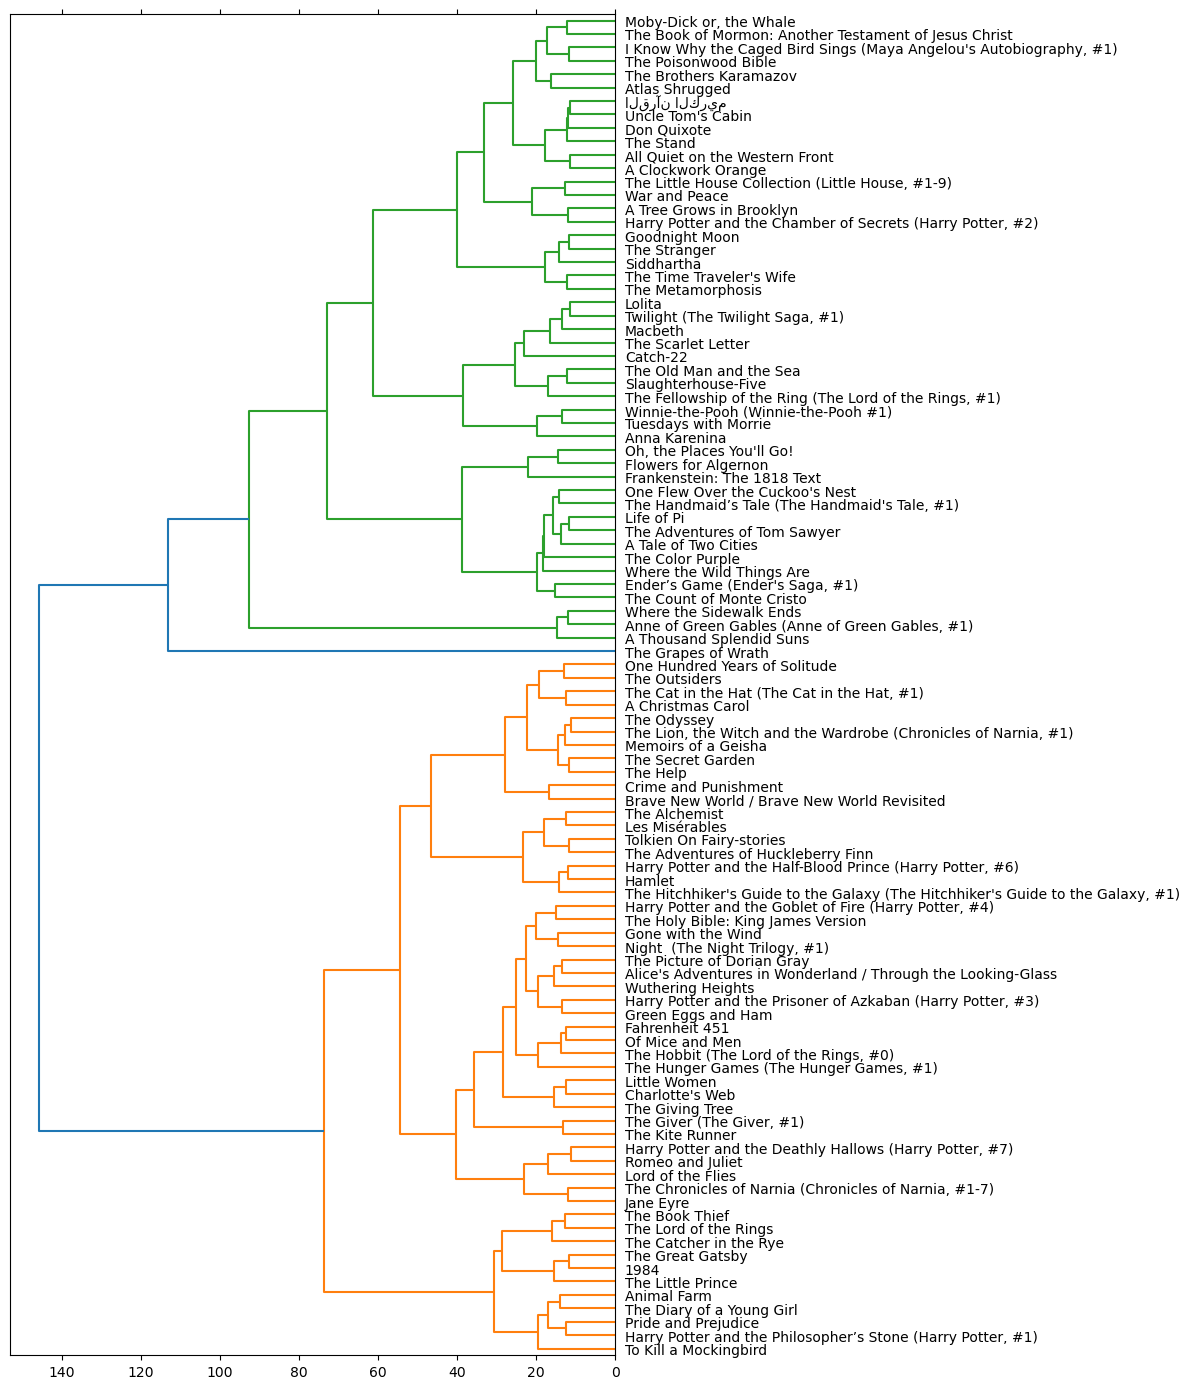

In [24]:
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           book_data=df,
                           figure_size=(12, 14))